# Supervised Machine Learning - Loan Prediction (Default Risk)

# Import & Data Loading

In [178]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
#to see graphs in the same jupyter notebook
%matplotlib inline
loan = pd.read_csv('Training Data.csv')
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [179]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [180]:
loan.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Exlporatory Data Analysis
1. How many have defaulted and How many have paid?

In [181]:
defaulted = len(loan.Risk_Flag[loan.Risk_Flag == 1])
Total = len(loan.Risk_Flag)
Rate_of_Risk = defaulted / Total 
print(f"Default Rate is {Rate_of_Risk*100}%")

Default Rate is 12.3%


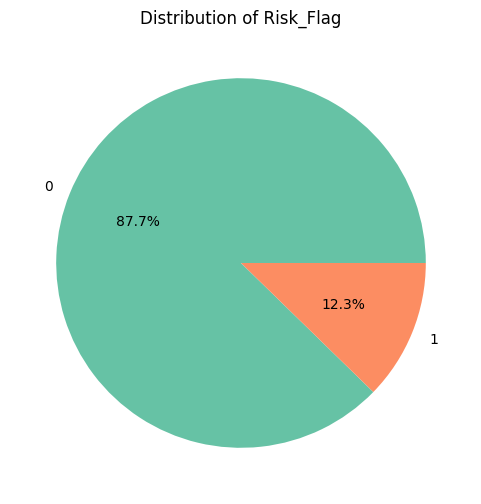

In [182]:
risk_flag_counts = loan['Risk_Flag'].value_counts()
# Set Seaborn's color palette
sns.set_palette("Set2")  # Set the color palette (optional)
# Plotting a pie chart using Matplotlib's plt.pie()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(risk_flag_counts, labels=risk_flag_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Risk_Flag')
plt.show()

### Seems this is an imbalance data set to predict the default risk, first do some analytics and later optimize the model

## Categorical Features (Univariate & Bivariate  Analysis)

In [183]:
loan.rename(columns = {"Married/Single" : "Marital_status"},inplace=True)
loan.Marital_status.value_counts()

Marital_status
single     226272
married     25728
Name: count, dtype: int64

In [184]:
pivot_table = loan.pivot_table(index='Marital_status', columns='Risk_Flag', aggfunc='size', fill_value=0)
print(pivot_table)
loan.head()



Risk_Flag            0      1
Marital_status               
married          23092   2636
single          197912  28360


,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<Figure size 640x480 with 0 Axes>

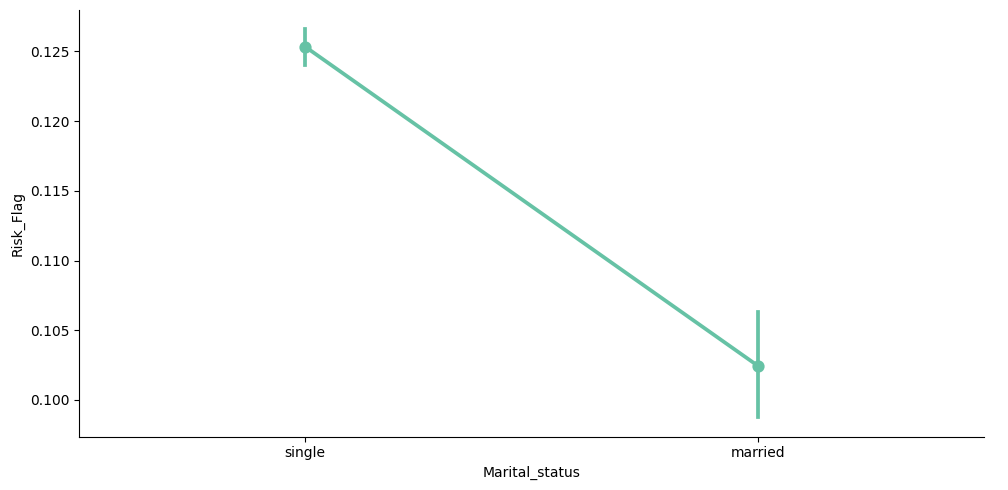

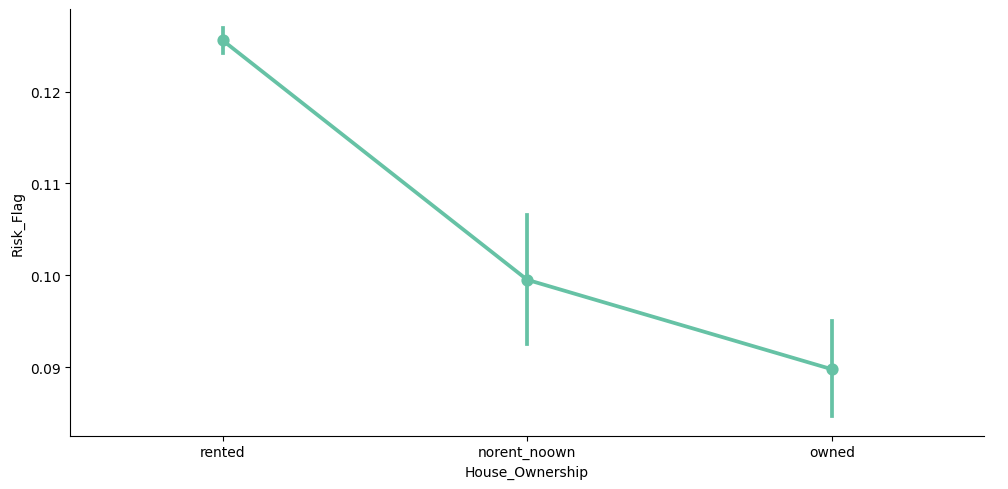

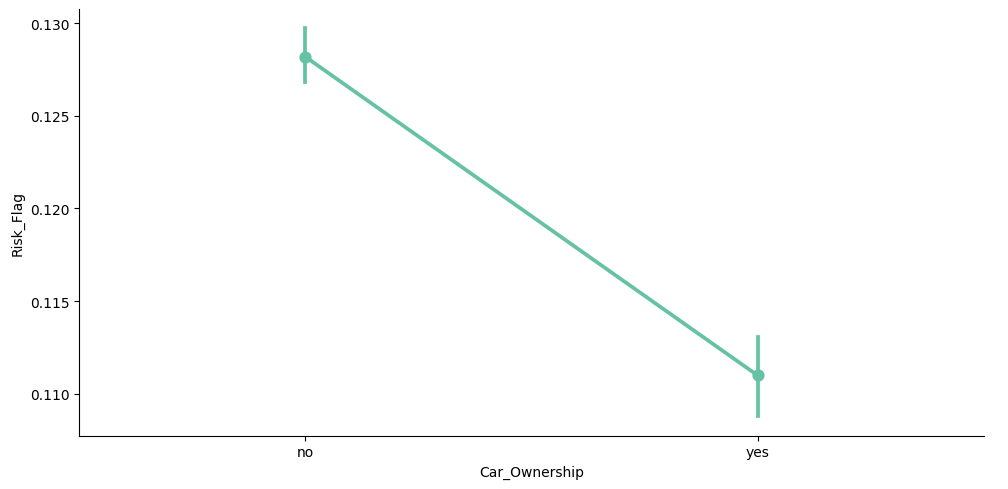

In [185]:
for i, col in enumerate(['Marital_status','House_Ownership', 'Car_Ownership']):
    plt.figure(i)
    sns.catplot(x=col, y='Risk_Flag', data=loan, kind='point', aspect=2, )

## Observation

1. Martial Status --> Singles are the highest loan takers and the highest default rate.
2. House_Ownership --> Rented people are high and have the highest default rate.
3. Car_Ownership --> people who dont have cars are the highest loan takers and the same time who has the highest default rate.

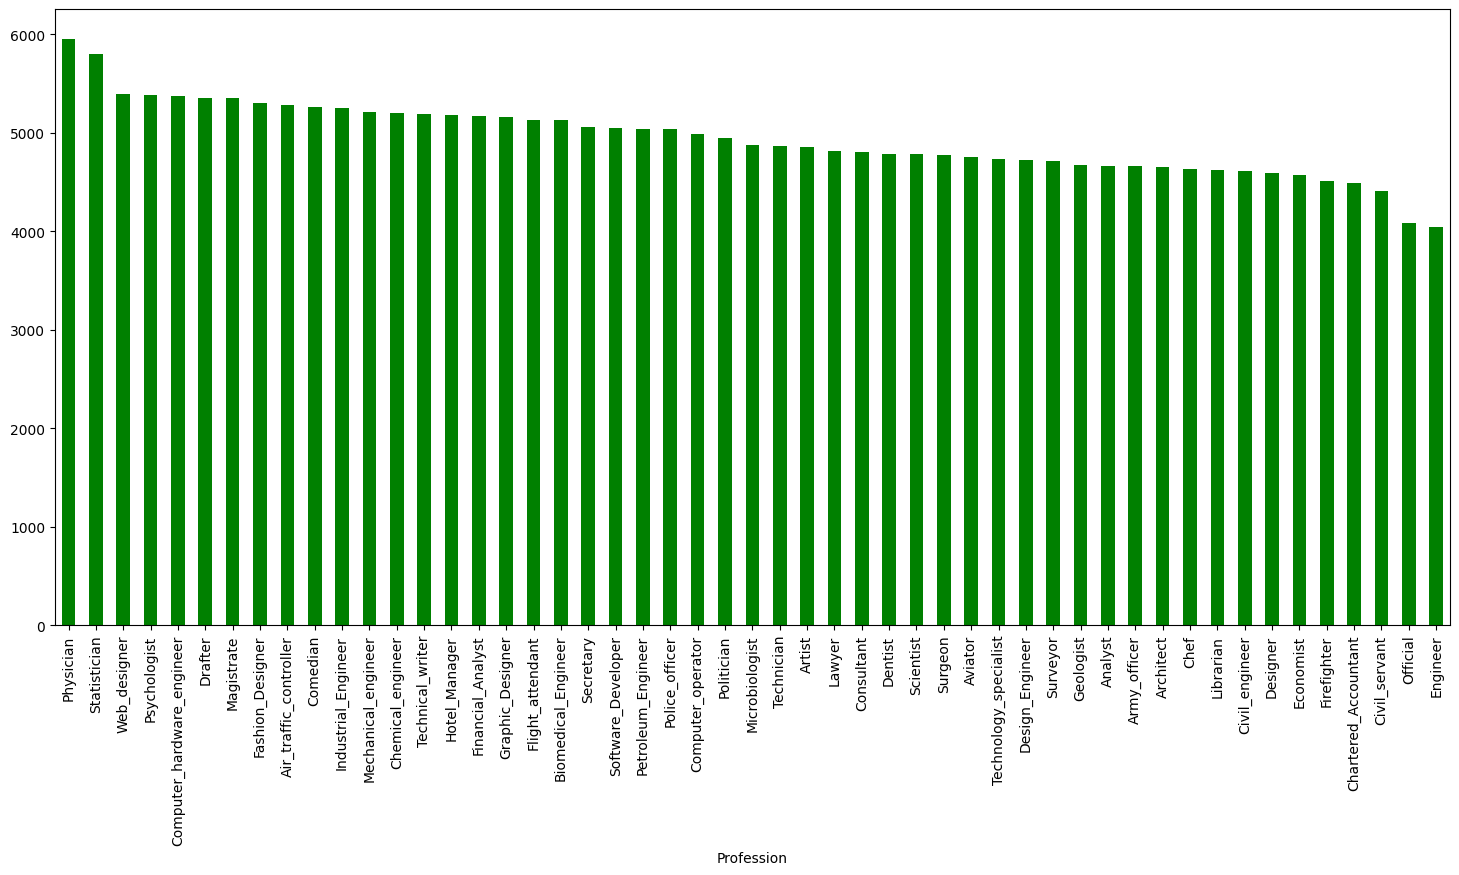

In [186]:
plt.subplots(figsize=(18,8))
loan.Profession.value_counts().plot.bar(color='green')
plt.show()

In [187]:
pivot_table = loan.pivot_table(index='Profession', columns='Risk_Flag', aggfunc='size', fill_value=0).sort_values(by=1, ascending=False).head()
print(pivot_table)


Risk_Flag                  0    1
Profession                       
Police_officer          4209  826
Software_Developer      4303  750
Air_traffic_controller  4566  715
Surveyor                4000  714
Physician               5247  710


#### Observation 
- According to the above observation we have highest loan takers are physicians and the loan default rates are under police officers

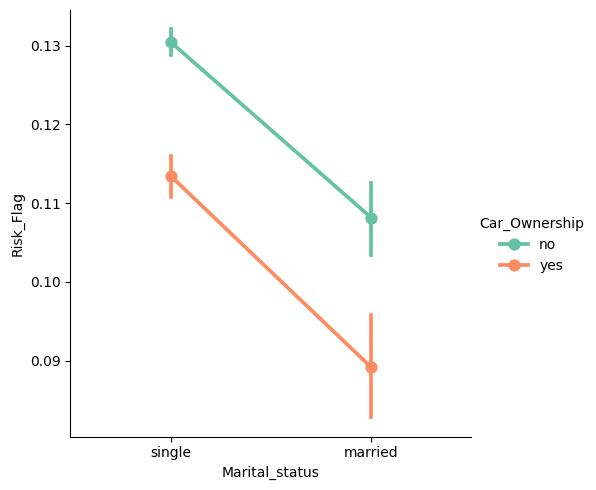

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a categorical plot using Seaborn's catplot
sns.catplot(x='Marital_status', y='Risk_Flag', hue='Car_Ownership', data=loan, kind='point')
plt.show()

- Here we can see both the singles who has a car and no car have the higest risks with respect to the married people

In [189]:
pivot_table = loan.pivot_table(index='STATE', columns='CITY', aggfunc='size', fill_value=0)
print(pivot_table)

CITY               Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  \
STATE                                                                     
Andhra_Pradesh       953         0     0          0           0       0   
Assam                  0         0     0          0           0       0   
Bihar                  0         0     0          0           0       0   
Chandigarh             0         0     0          0           0       0   
Chhattisgarh           0         0     0          0           0       0   
Delhi                  0         0     0          0           0       0   
Gujarat                0         0     0        649           0       0   
Haryana                0         0     0          0           0       0   
Himachal_Pradesh       0         0     0          0           0       0   
Jammu_and_Kashmir      0         0     0          0           0       0   
Jharkhand              0         0     0          0           0       0   
Karnataka              0 

In [190]:
(pd.crosstab(loan.STATE, loan.Risk_Flag, margins=True)[1] / pd.crosstab(loan.STATE, loan.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head(10)

STATE
Manipur              0.215548
Tripura              0.168109
Kerala               0.167097
Jammu_and_Kashmir    0.158989
Madhya_Pradesh       0.154369
Odisha               0.142550
Rajasthan            0.140833
Jharkhand            0.133296
Chhattisgarh         0.133281
Himachal_Pradesh     0.133253
dtype: float64

- Manipur has the highest default rate, 21 %

In [191]:
pivot_table = loan.pivot_table(index='STATE', columns='Risk_Flag', aggfunc='size', fill_value=0).sort_values(by=1, ascending=False).head()
print(pivot_table)

Risk_Flag           0     1
STATE                      
Uttar_Pradesh   25057  3343
West_Bengal     20474  3009
Andhra_Pradesh  22362  2935
Maharashtra     22667  2895
Bihar           17197  2583


In [192]:
(pd.crosstab(loan.CITY, loan.Risk_Flag, margins=True)[1] / pd.crosstab(loan.CITY, loan.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head()

CITY
Bhubaneswar    0.326194
Gwalior        0.272727
Bettiah[33]    0.266958
Kochi          0.252862
Raiganj        0.239554
dtype: float64

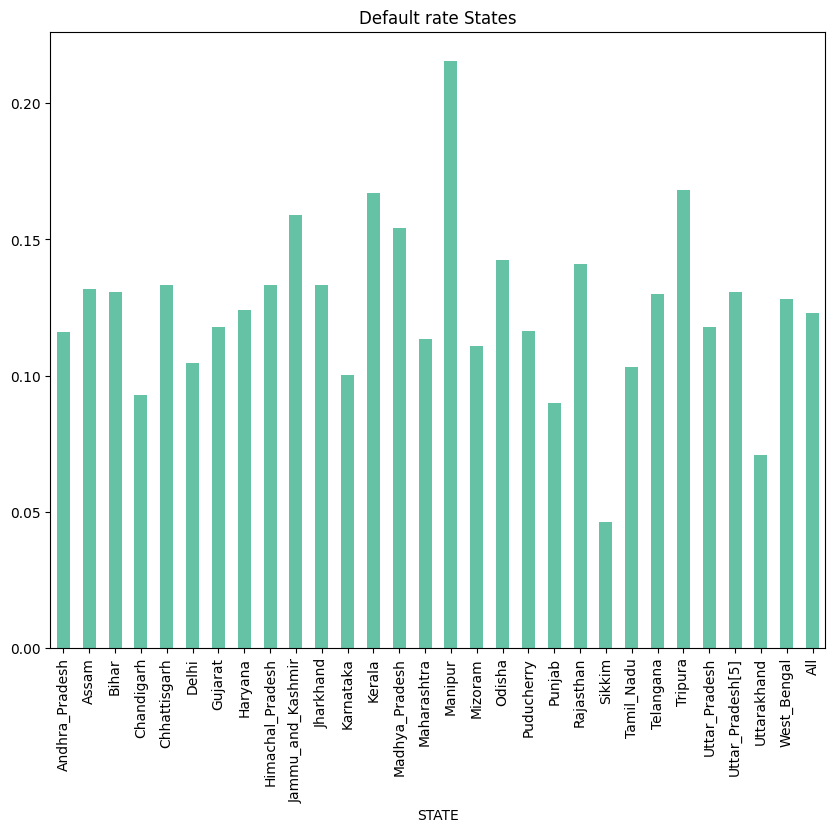

In [193]:
(pd.crosstab(loan.STATE, loan.Risk_Flag, margins=True)[1] / pd.crosstab(loan.STATE, loan.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Default rate States")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- City -> Highest default rate was reported in Bhubaneswar (Odisha)
- State --> Highest default rate was reported in Manipur
- These two are mutually independent 
- Odisha doesnt have the highest default rate the sametime

## Continuous Data Exploration (Univariate & Bivariate  Analysis)

#### Income

In [194]:
loan.head()

,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


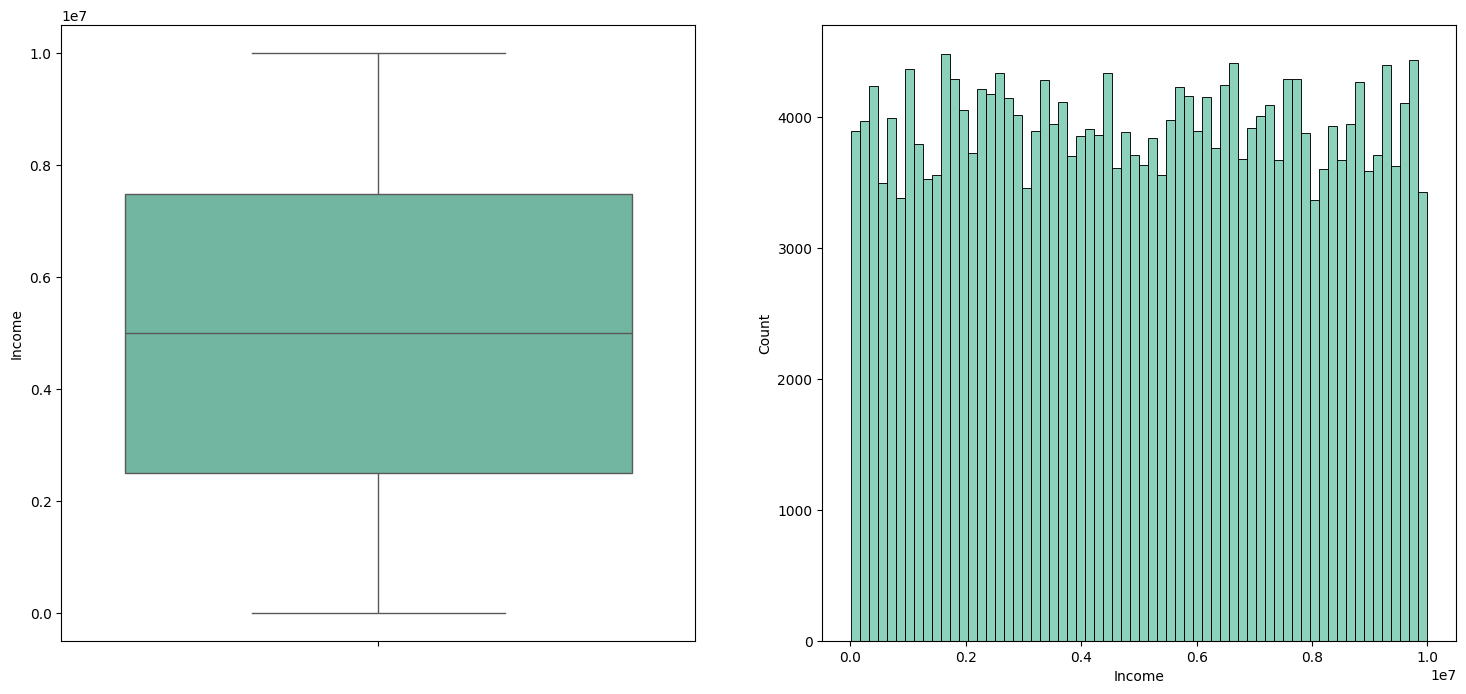

In [195]:
f , ax = plt.subplots(1,2,figsize=(18,8))
sns.histplot(loan.Income, ax=ax[1]);
sns.boxplot(loan.Income, ax=ax[0]);

In [196]:
pivot_table = loan.pivot_table(index='Income', columns='Risk_Flag', aggfunc='size', fill_value=0).sort_values(by=1, ascending=False).head()
print(pivot_table)

Risk_Flag  0   1
Income          
6715263    4  34
3424035    3  34
3154685    4  34
1362373    3  34
700444     4  34


- Income data shows the normality behaviour with no outliers as well

In [197]:
loan.Income.describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

In [198]:
pd.crosstab(loan.Profession ,loan.Income)

Income,10310,10675,11114,11430,11483,11550,11695,11735,11799,11854,...,9996192,9996861,9996946,9996947,9996969,9998070,9998280,9999180,9999400,9999938
Profession,,,,,,,,,,,,,,,,,,,,,
Air_traffic_controller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Analyst,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Architect,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Army_officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Artist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aviator,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Biomedical_Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chartered_Accountant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chef,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Age

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17024\2854913100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan.Age, ax=ax[1])
c:\ProgramData\anaconda3\envs\mlproj\lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


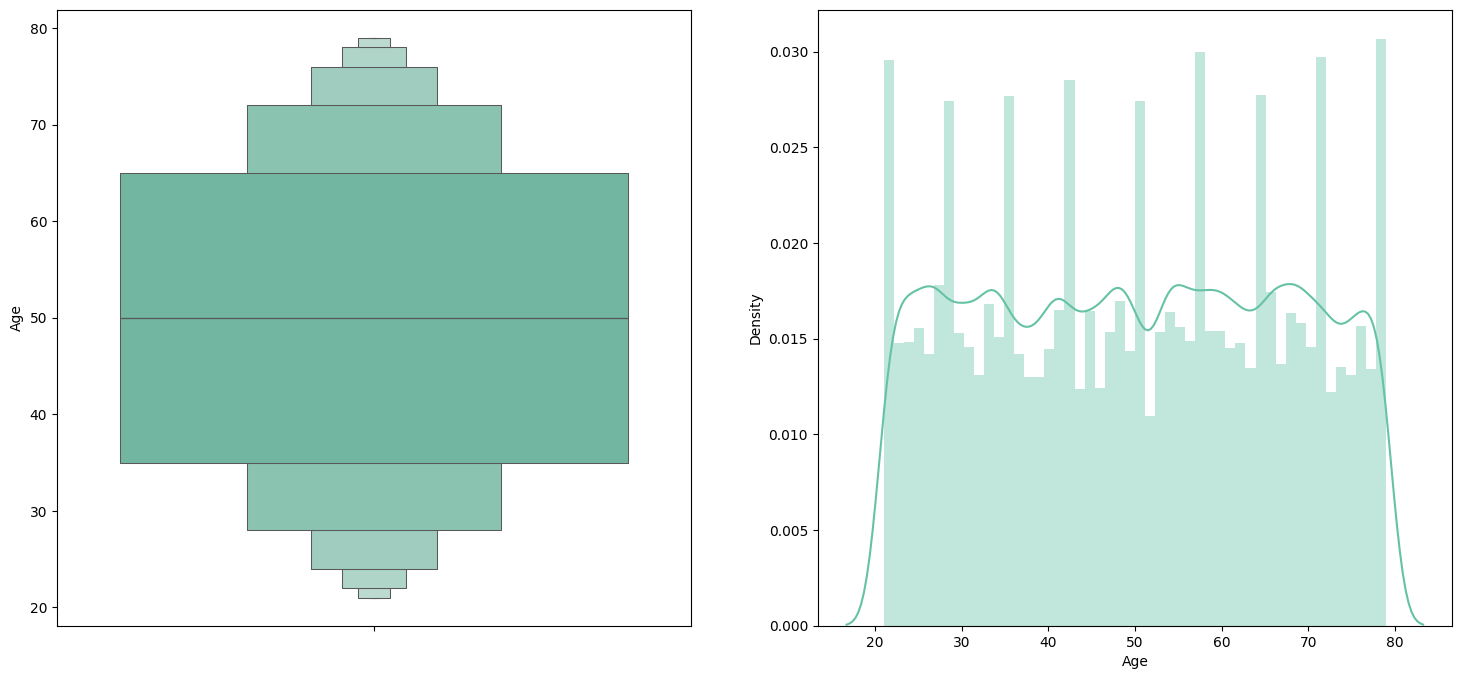

In [199]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.distplot(loan.Age, ax=ax[1])
sns.boxenplot(y=loan.Age, ax=ax[0], orient='h')
plt.show()

In [200]:
pivot_table = loan.pivot_table(index='Age', columns='Risk_Flag', aggfunc='size', fill_value=0).sort_values(by=1, ascending=False).head(15)
print(pivot_table)

Risk_Flag     0    1
Age                 
22         3660  770
66         4355  737
27         4477  720
33         4202  719
26         3437  719
76         3919  666
54         4125  660
24         3695  631
47         3867  616
28         3299  602
21         3607  598
59         3907  591
30         3879  589
45         4217  589
25         3959  584


-  The oldest age is 79, the youngest is 21, and the average age is 49. Also, the box plot indicates that the density is higher between 35 and 65, indicating that this range receives the majority of loans.

Text(0.5, 1.0, 'Risk_Flag vs Experience')

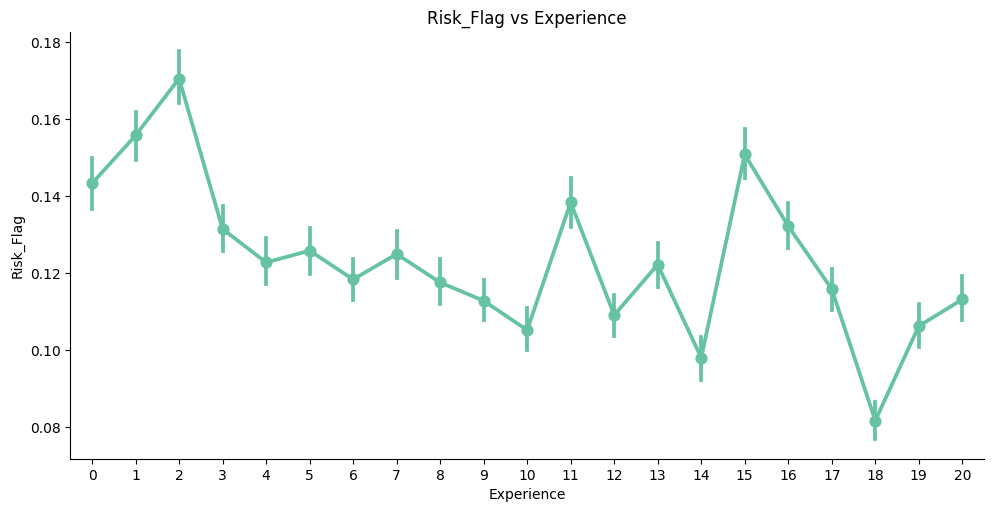

In [201]:
sns.catplot(x='Experience', y='Risk_Flag', data=loan, kind='point',aspect=2)
plt.title('Risk_Flag vs Experience')

- We can see we are now having the down trend with the experience so we can say, people with less experience have more risk in taking loan.

<Figure size 640x480 with 0 Axes>

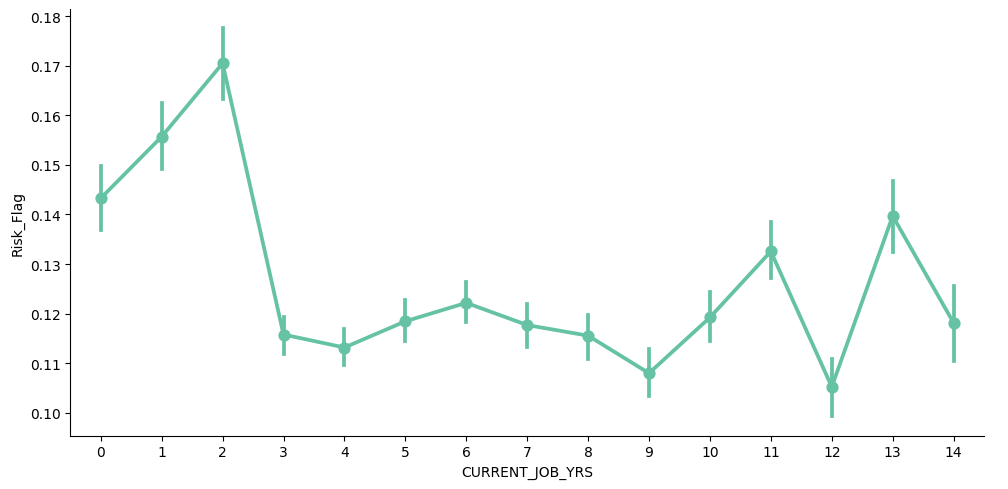

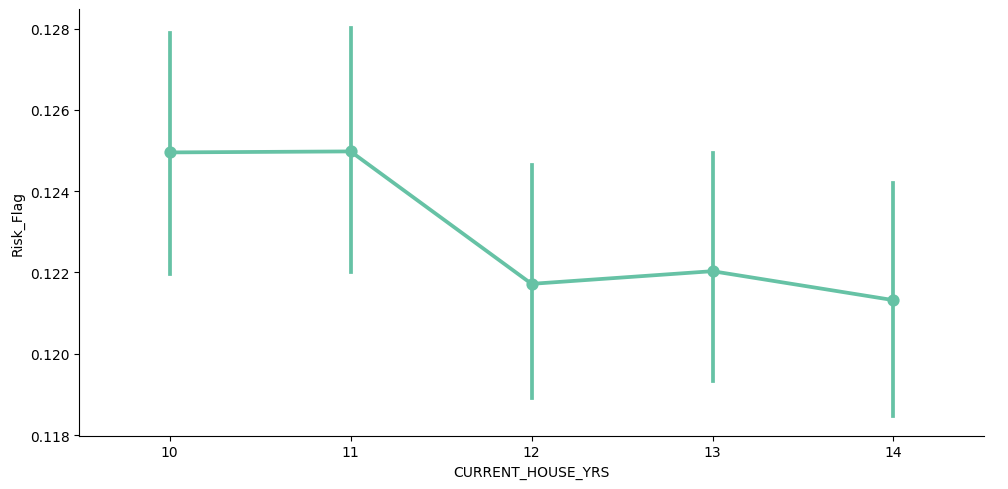

In [202]:
for i, col in enumerate(['CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']):
    plt.figure(i)
    sns.catplot(x=col, y='Risk_Flag', data=loan, kind='point', aspect=2, )

- People who has less current job years have the high risk of loan paying back, also after two years there is drastic different and downtrend continuous with slight variations.

- Current House Years shows the complete down trend and after 10 they have the ability to payback rate is high that means low risk.

## Feature Engineering 

### Income_Band from Income

In [203]:
loan["Income_band"] = 0
loan.loc[(loan["Income"] > 0) & (loan["Income"] <= 1000000), "Income_band"] = 1
loan.loc[(loan["Income"] > 1000000) & (loan["Income"] <= 2000000), "Income_band"] = 2
loan.loc[(loan["Income"] > 2000000) & (loan["Income"] <= 3000000), "Income_band"] = 3
loan.loc[(loan["Income"] > 3000000) & (loan["Income"] <= 4000000), "Income_band"] = 4
loan.loc[(loan["Income"] > 4000000) & (loan["Income"] <= 5000000), "Income_band"] = 5
loan.loc[(loan["Income"] > 5000000) & (loan["Income"] <= 6000000), "Income_band"] = 6
loan.loc[(loan["Income"] > 6000000) & (loan["Income"] <= 7000000), "Income_band"] = 7
loan.loc[(loan["Income"] > 7000000) & (loan["Income"] <= 8000000), "Income_band"] = 8
loan.loc[(loan["Income"] > 8000000) & (loan["Income"] <= 9000000), "Income_band"] = 9
loan.loc[(loan["Income"] > 9000000) & (loan["Income"] <= 10000000), "Income_band"] = 10


In [204]:
loan["Income_band"].value_counts().to_frame().style.background_gradient(cmap='viridis')

,count
Income_band,
7,25784
2,25782
3,25764
8,25567
6,25297
4,25200
10,25138
5,24757
1,24455


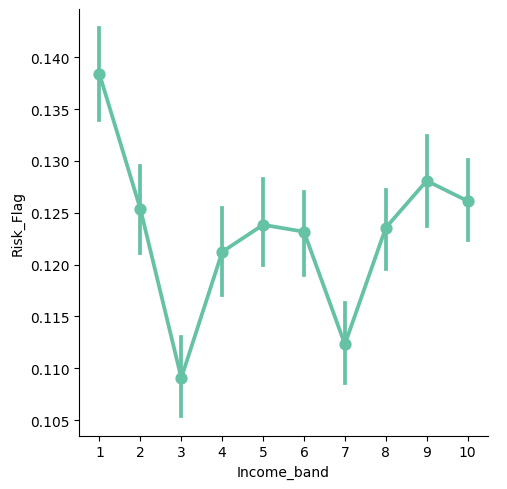

In [205]:
sns.catplot(x='Income_band',y='Risk_Flag', data=loan,kind='point');

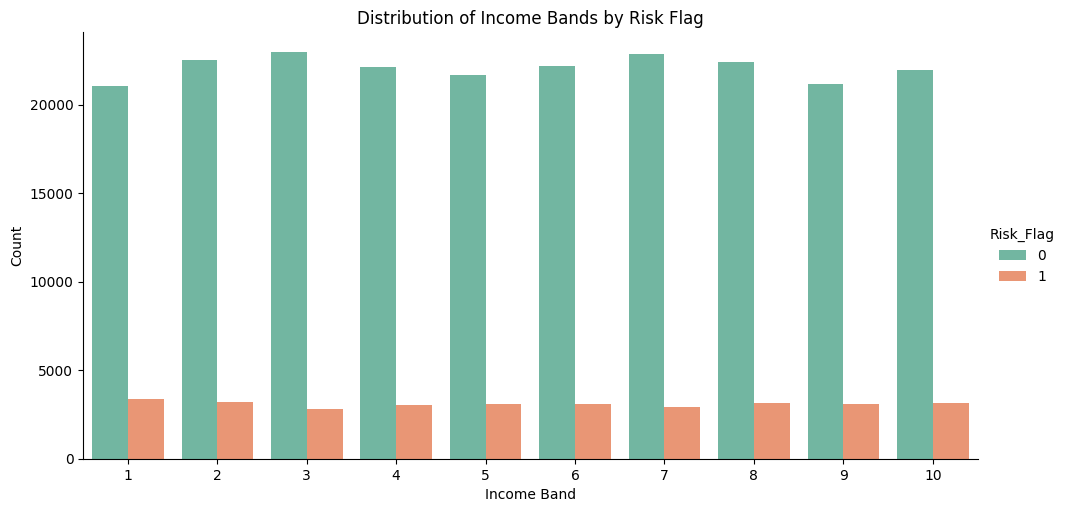

In [206]:
sns.catplot(data=loan, x='Income_band', hue='Risk_Flag', kind='count', aspect=2,)
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.title('Distribution of Income Bands by Risk Flag')
plt.show()


### Age_band from Age

In [207]:
loan["Age_band"] = 0
loan.loc[(loan["Age"] >= 21) & (loan["Age"] <= 33), "Age_band"] = 0
loan.loc[(loan["Age"] > 33) & (loan["Age"] <= 45), "Age_band"] = 1
loan.loc[(loan["Age"] > 45) & (loan["Age"] <= 57), "Age_band"] = 2
loan.loc[(loan["Age"] > 57) & (loan["Age"] <= 69), "Age_band"] = 3
loan.loc[(loan["Age"] > 69) & (loan["Age"] <= 79), "Age_band"] = 4

In [208]:
loan["Age_band"].value_counts().to_frame().style.background_gradient(cmap='viridis')

,count
Age_band,
0,56669
3,52435
2,51074
1,50075
4,41747


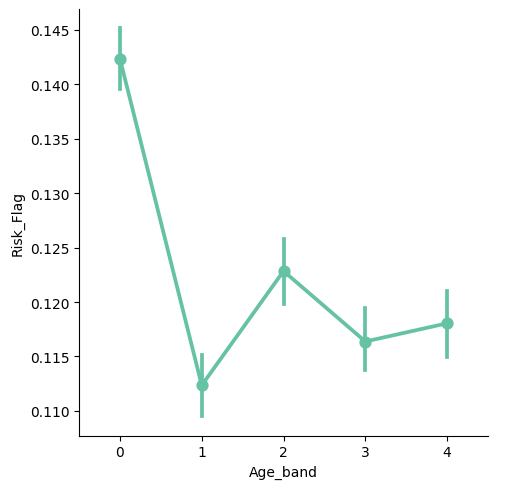

In [209]:
sns.catplot(x='Age_band',y='Risk_Flag', data=loan,kind='point');

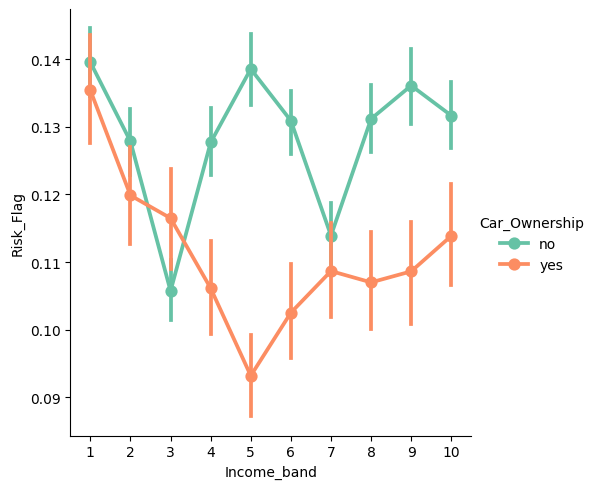

In [210]:
sns.catplot(x='Income_band',y='Risk_Flag', data=loan, hue="Car_Ownership",kind='point')

- Income band 5 with car and without car shows drastic different also in high income band without a car has a high default risk and thats bit unrealistic.
- Downtrend continues in risk till income band 3 and 5 without a car and with a car. 

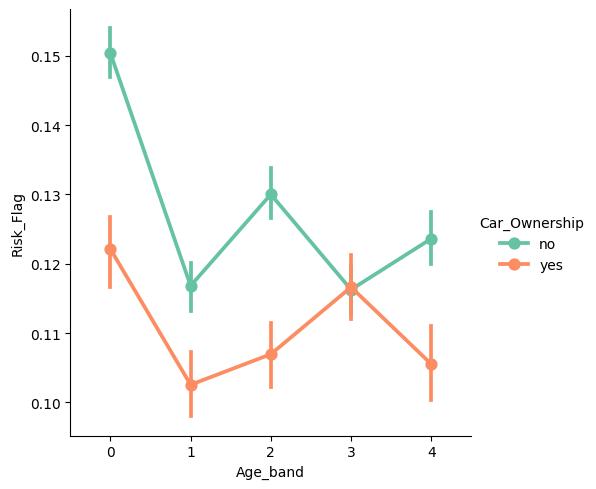

In [211]:
sns.catplot(x='Age_band',y='Risk_Flag', data=loan, hue="Car_Ownership",kind='point')

- Having a car shows a low risk rather than without a car even under the high age limit

#### Creating a new feature and remove multicolinearity

- EXPERIENCE and CURRENT_JOB_YRS = Total Experience

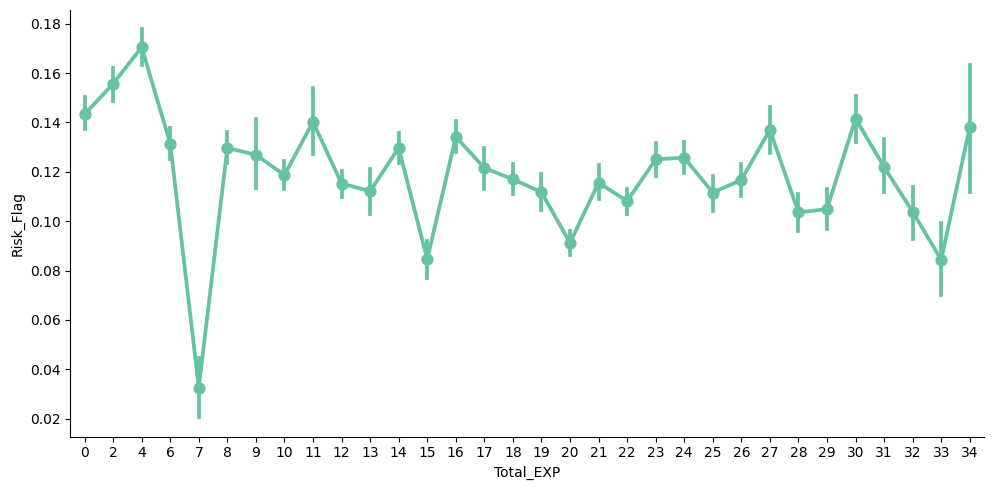

In [212]:
loan['Total_EXP']=loan['Experience']+loan['CURRENT_JOB_YRS']
sns.catplot(x='Total_EXP',y='Risk_Flag',data=loan,kind='point',aspect=2,)

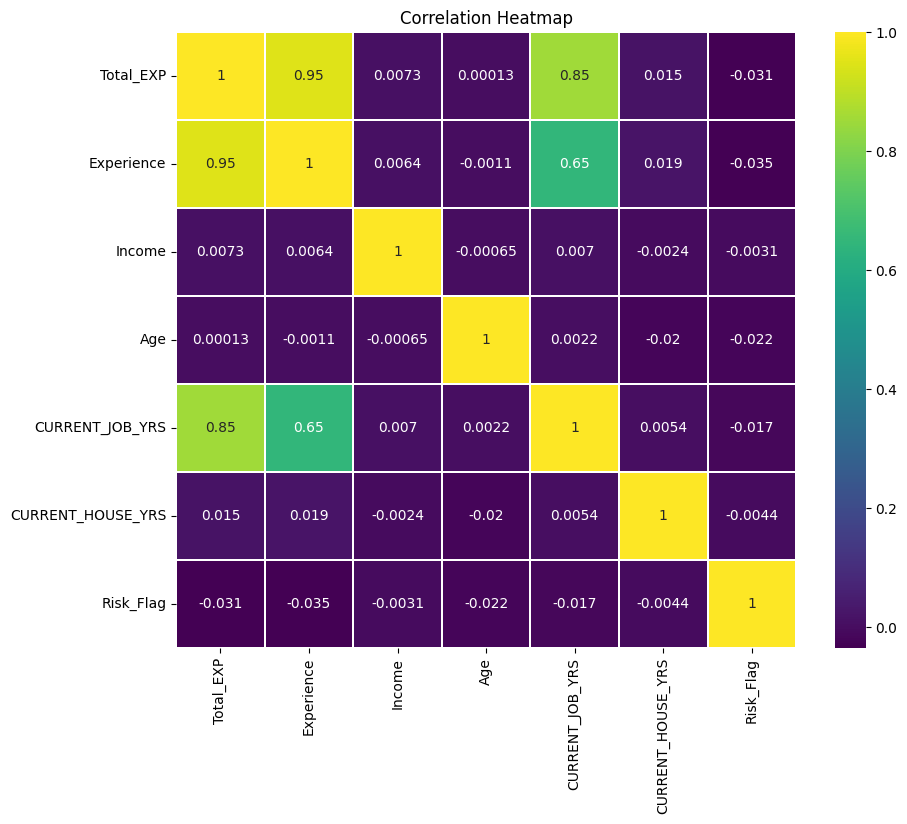

In [213]:
cols_to_correlate = ['Total_EXP','Experience','Income','Age','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

correlation_matrix = loan[cols_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

- Creation of the new feature make sense as shown in the heatmap as well, by removing multicolinearity we can feed the feature into the model.

## Dropping the Features

In [214]:
loan.drop(["Id", "Income", "Income_band", "Age", "Experience","CURRENT_JOB_YRS",], axis=1, inplace=True)

In [215]:
loan.head()

,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Total_EXP
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,13,0,0,6
1,single,rented,no,Software_Developer,Parbhani,Maharashtra,13,0,1,19
2,married,rented,no,Technical_writer,Alappuzha,Kerala,10,0,3,8
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,12,1,1,4
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,14,1,2,14


### Encoding Categorical Variables

In [216]:
from sklearn.preprocessing import LabelEncoder

features = ["Marital_status", "House_Ownership", "Car_Ownership", "Profession","CITY", "STATE",]
label_encoder = LabelEncoder()

for col in features:
    loan[col] = label_encoder.fit_transform(loan[col])

In [217]:
loan.head()

,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Total_EXP
0,1,2,0,33,251,13,13,0,0,6
1,1,2,0,43,227,14,13,0,1,19
2,0,2,0,47,8,12,10,0,3,8
3,1,2,1,43,54,17,12,1,1,4
4,1,2,0,11,296,22,14,1,2,14


#### Feature Scaling

In [218]:
from sklearn.preprocessing import StandardScaler

# Extract columns to be scaled
columns_to_scale = loan.columns[loan.columns != 'Risk_Flag']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the selected columns and transform them
loan_scaled = scaler.fit_transform(loan[columns_to_scale])

# Convert the scaled features array back to a DataFrame
loan_scaled_df = pd.DataFrame(loan_scaled, columns=columns_to_scale)

# Concatenate with the 'Risk_Flag' column
loan_scaled_df['Risk_Flag'] = loan['Risk_Flag']

# Display the head of the scaled DataFrame
loan_scaled_df.head()


,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Age_band,Total_EXP,Risk_Flag
0,0.337200,0.276304,-0.657129,0.524374,1.007167,-0.086313,0.716356,-1.351687,-1.182524,0
1,0.337200,0.276304,-0.657129,1.203330,0.746867,0.020384,0.716356,-0.636863,0.293033,0
2,-2.965599,0.276304,-0.657129,1.474912,-1.628364,-0.193011,-1.427981,0.792785,-0.955515,0
3,0.337200,0.276304,1.521772,1.203330,-1.129457,0.340477,0.001577,-0.636863,-1.409533,1
4,0.337200,0.276304,-0.657129,-0.969327,1.495228,0.873965,1.431135,0.077961,-0.274489,1


In [219]:
loan_scaled_df.to_csv('transformed.csv',index=False)

In [220]:
loan_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Marital_status     252000 non-null  float64
 1   House_Ownership    252000 non-null  float64
 2   Car_Ownership      252000 non-null  float64
 3   Profession         252000 non-null  float64
 4   CITY               252000 non-null  float64
 5   STATE              252000 non-null  float64
 6   CURRENT_HOUSE_YRS  252000 non-null  float64
 7   Age_band           252000 non-null  float64
 8   Total_EXP          252000 non-null  float64
 9   Risk_Flag          252000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 19.2 MB


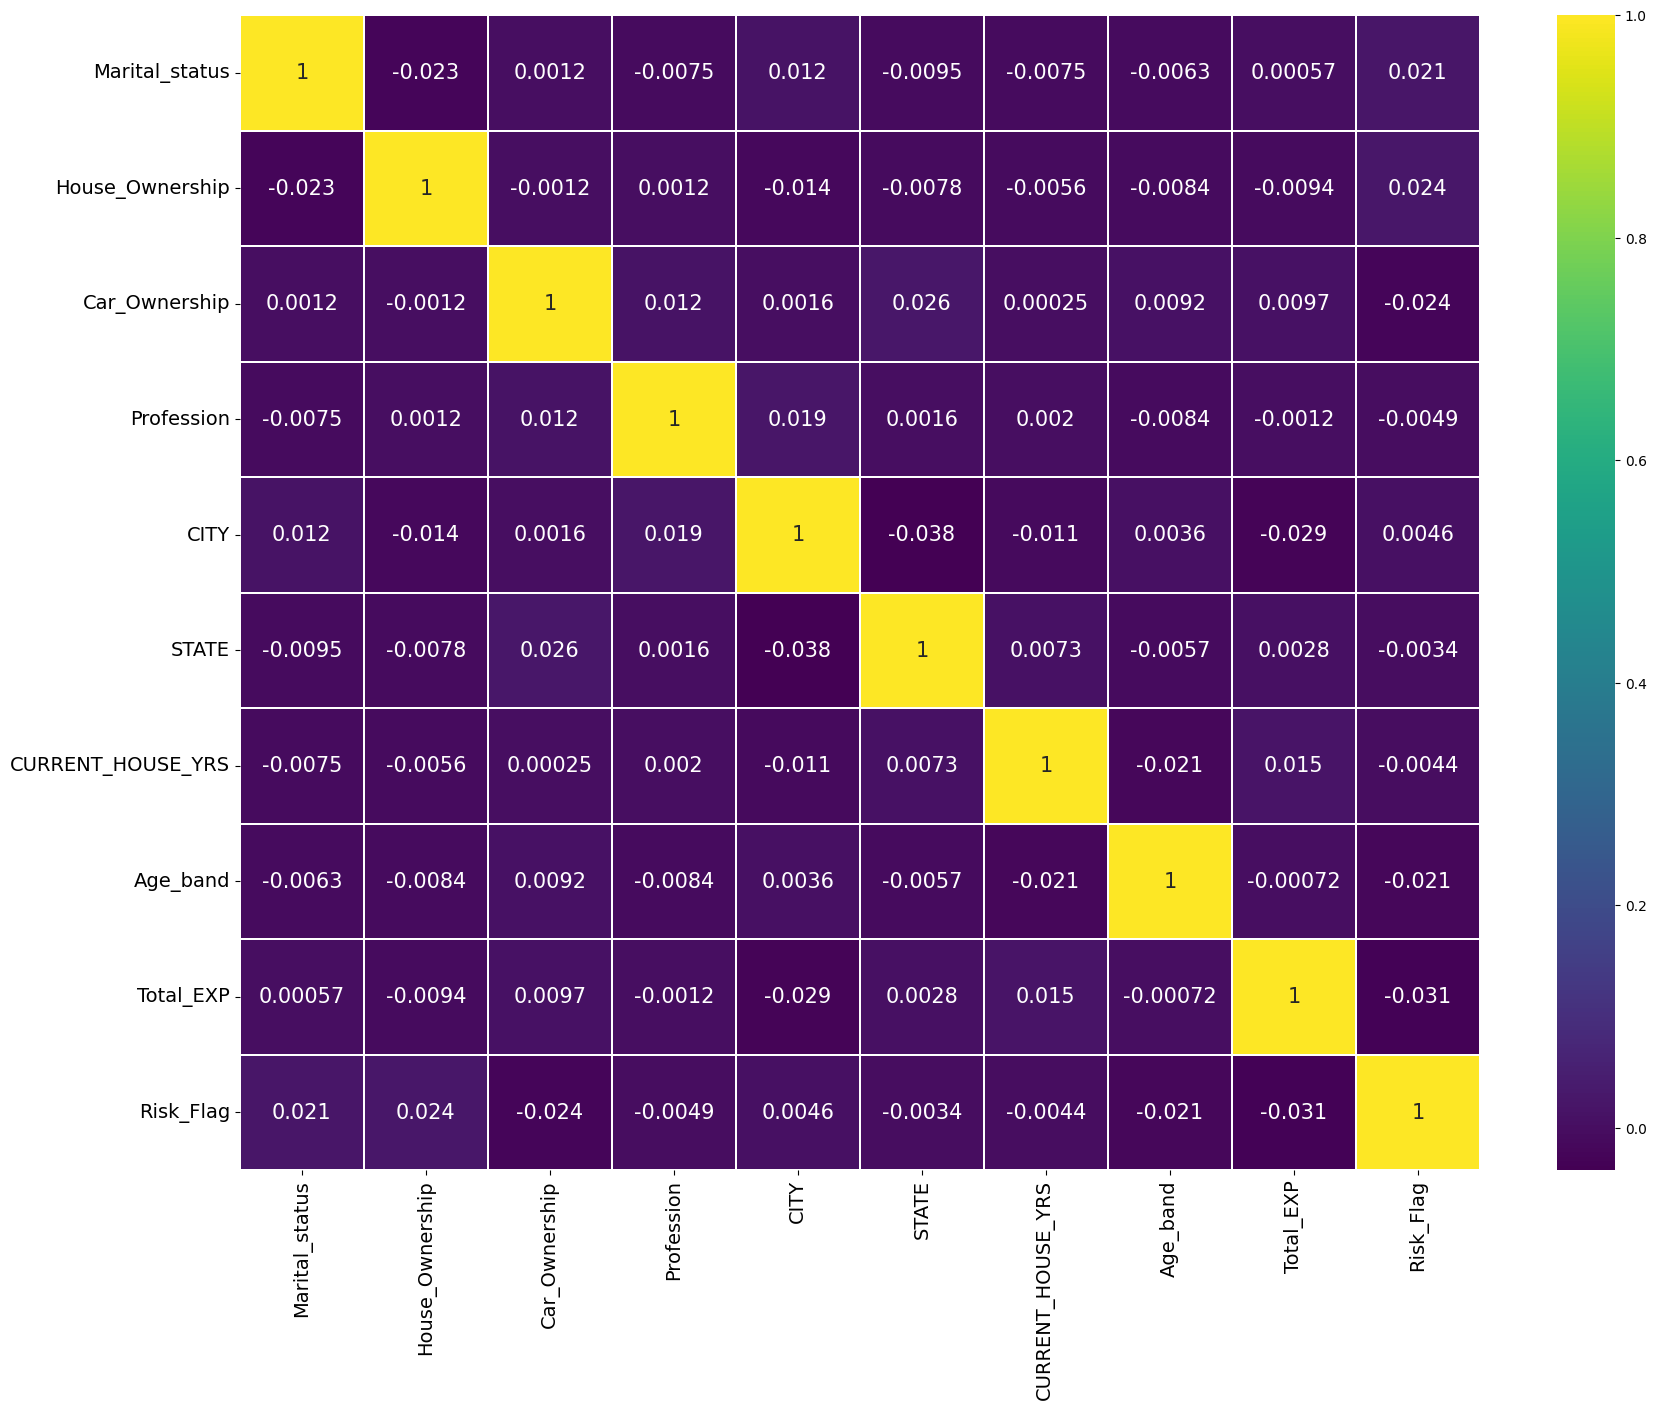

In [221]:
sns.heatmap(loan_scaled_df.corr(), annot=True, linewidth=0.2, annot_kws={"size":15}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Modelling 

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

features = loan_scaled_df.drop('Risk_Flag',axis=1)
labels = loan_scaled_df['Risk_Flag']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

for dataset in (y_train,y_val,y_test):
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


#### Write out divided data into CSV

In [223]:
x_train.to_csv('train_features.csv',index=False)
x_val.to_csv('val_features.csv',index=False)
x_test.to_csv('test_features.csv',index=False)

y_train.to_csv('train_labels.csv',index=False)
y_val.to_csv('val_labels.csv',index=False)
y_test.to_csv('test_lables.csv',index=False)

#### Naming the variables

In [224]:

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')


### Tune Hyperparameters - XGBoostclassifier

In [225]:
#Finding the results of every hyperparameter combination about the average accuracy score across the five folds and the STD across the same.
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [226]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Creating an instance of XGBClassifier
xgb_model = xgb.XGBClassifier()

# Defining the parameters for GridSearchCV
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [12, 14, 18, None]}

# Performing GridSearchCV
cv = GridSearchCV(xgb_model, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

# Function to print the results
def print_results(cv):
    print("Best Parameters: {}".format(cv.best_params_))
    print("Best Score: {:.2f}".format(cv.best_score_))

# Printing the results
print_results(cv)


Best Parameters: {'max_depth': 14, 'n_estimators': 100}
Best Score: 0.90


#### Check Feature importance 

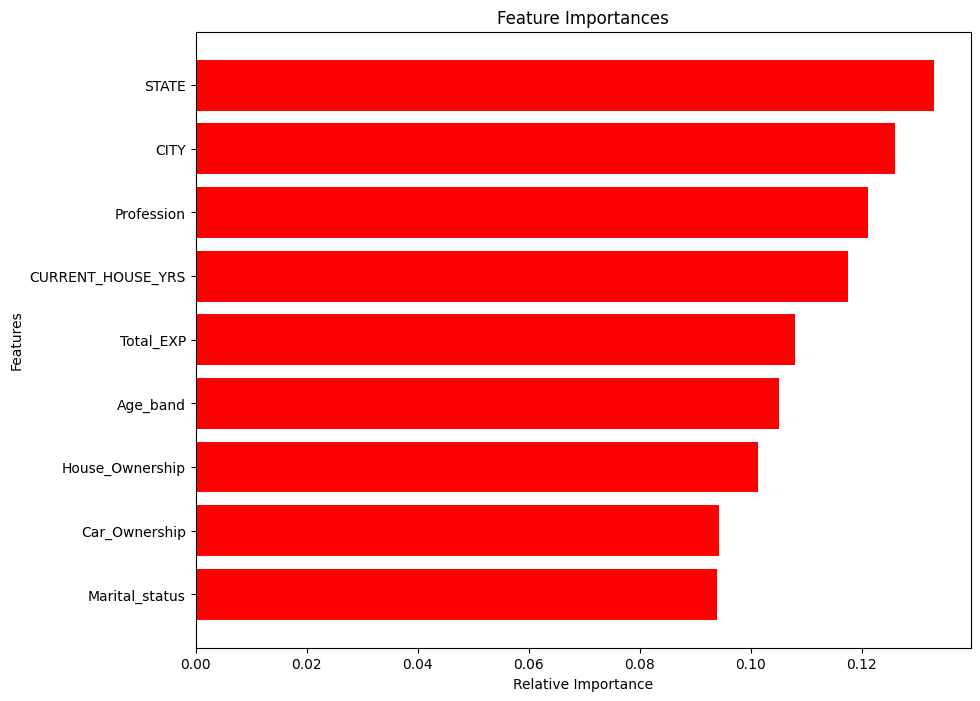

In [227]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve the best estimator from the GridSearchCV results
best_xgb_model = cv.best_estimator_

# Extract feature importances from the best estimator
feat_imp = best_xgb_model.feature_importances_

# Get the indices that would sort the feature importances in ascending order
indices = np.argsort(feat_imp)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.yticks(range(len(indices)), [tr_features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


#### Evaluate model on validation set 

In [228]:
xgb_model=xgb.XGBClassifier(n_estimators=100,max_depth=14)
xgb_model.fit(tr_features,tr_labels.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [229]:
for mdl in [xgb_model]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 14 / # OF EST: 100 -- A: 0.896 / P: 0.588 / R: 0.545


#### Confusion Matrix

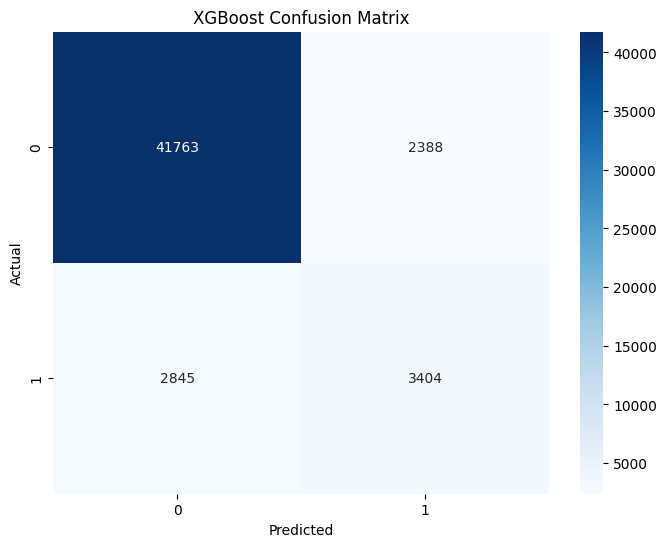

In [230]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted values using the best estimator from GridSearchCV
best_xgb_model = cv.best_estimator_
y_pred = best_xgb_model.predict(val_features)

# Compute the confusion matrix
cm = confusion_matrix(val_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='2.0f', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



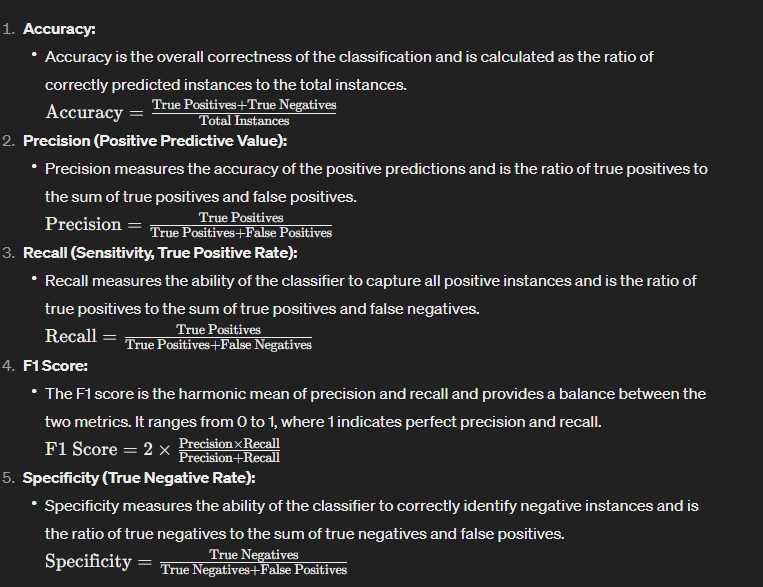

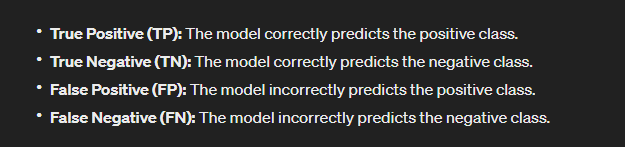